In [94]:
import numpy as np
import cv2
import ImageView as iv
import eksplisitt as eks
import matplotlib.pyplot as plt
%matplotlib inline

lena = 'lena.png'
LFC = 'LFC.jpeg'

def anonym(image):
    

def detectFace(file, title):
    """
    Oppdager et ansikt vendt mot kamera
   
    Parameters
    ---------
    file         : Bildefil
                    Pathen til filen der original bildet befinner seg uten andvending
    scaleFactor  : int
                    Kompenserer i tilfelle noen ansikter er nærmere kamera enn andre
    minNeighbors : int
                    spesifiserer antall naboer en rektangel bør ha for å bli kalt et "ansikt"
    title        : text
                    Tittelen på bildet som er anvendt
    """
    image = cv2.imread(file)
    def convertToRGB(image): #open CV laster bilder i BGR. Konverterer til RGB
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = haar_cascade_face.detectMultiScale(image, 1.1, 4)
    
    for (x,y,w,h) in faces:
        ROI = image[y:y+h, x:x+w] #Region of Interest --> Kvadratet rundt ansiktet
        blur = eks.eksplisitt(ROI,0) #
        image[y:y+h, x:x+w] = blur 
    print("Antall ansikt er", len(faces))
        
    iv.singleView(convertToRGB(image), title)

Antall ansikt er 1


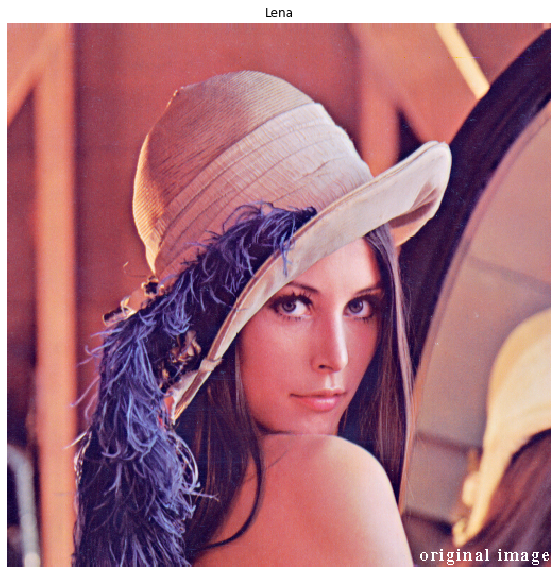

In [95]:
detectFace(lena,"Lena")